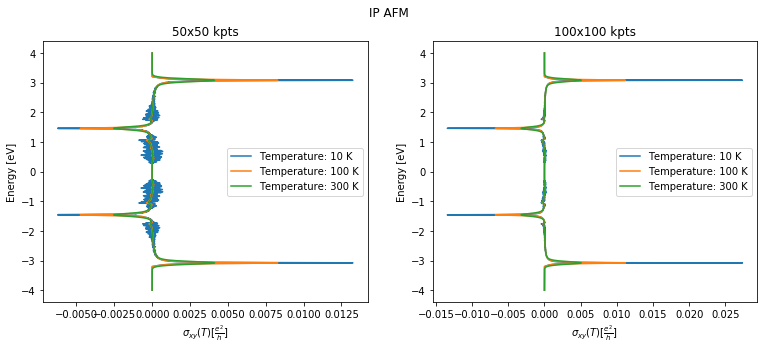

In [5]:
key = 'anticol_theta'
rotation = 'scancol'
rotation2 = 'scancolflip'
seedfname = "path_rel_G-K-Kprime_test_kpts"
seedfnamesq = 'sq_fill_anticol'
save_str = seedfname + '_' + key + '_' + rotation
prefix = "/Users/kipp/STB/output/"
prefix_stb = "/Users/kipp/STB/"
prefix_inis = "/Users/kipp/STB/inis/"
save_prefix = "/output/" + seedfname
magtype = 'anticol'
label = ["$\Gamma$", "$K^{'}$", "K", "$\Gamma$"]
plotlables = ['50x50 kpts','100x100 kpts']
#fname = seedfname + '_' + key + '_' + rotation
fname = seedfname
k = 20
key = 'temperature'
kppd = np.zeros(2,dtype = int)
pattern = key + "\s*=\s*['a-z]+|" + key + "\s*=\s*(\d+(.\d*)+(.\d*)E\+\d\d)|" + key + "\s*=\s*"

fig,ax = plt.subplots(nrows=1,ncols = 2,figsize = (2*6.4,4.8))
fig.suptitle('IP AFM')

for numax,axes in enumerate(ax):
    axes.set_title(plotlables[numax])
    axes.set_xlabel(r'$\sigma_{xy} (T) [\frac{e^2}{h}]$')
    axes.set_ylabel('Energy [eV]')
    axes.xaxis.set_major_formatter(plt.ScalarFormatter(useOffset = True))
    axes.xaxis.get_major_formatter().set_scientific(True)
    axes.xaxis.get_major_formatter().set_powerlimits(lims = (-3,4))

    for l in range(3):
    #print(prefix + fname + '_{:02}/'.format(j) + 'hall_cond_iter={:05}.npy'.format(j))
        loadstr = prefix + fname + '_{0}{1}/hall_cond.npy'.format(l,numax) 
        Eloadstr = prefix + fname + '_{0}{1}/hall_cond_E.npy'.format(l,numax) 
        hc = np.load(loadstr)
        hc_E = np.load(Eloadstr)
        count = 0
        with open(prefix + fname + '_{0}{1}'.format(l,numax)  + 'setup.cfg','r+') as fin:
            for num,line in enumerate(fin,1):
                s = re.search(pattern,line)
                if s!=None:
                    if s.group(2)!=None:
                        kppd[count] = float(s.group(1))
                        count +=1
        axes.plot(hc,hc_E,label = 'Temperature: {} K'.format(kppd[0]))
    axes.legend()
#with PdfPages("/Users/kipp/STB/weyl_figures/Weyl_figures/" + 'ip_afm_Convergence_Behaviour_Temperature') as pdf:
#    pdf.savefig(fig)


In [2]:
prefix + fname + '_{0}{1}/hall_cond.npy'.format(0,1) 

NameError: name 'prefix' is not defined

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import re
from matplotlib.backends.backend_pdf import PdfPages
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [39]:
key = 'anticol_theta'
rotation = 'scancol'
rotation2 = 'scancolflip'
seedfname = "path_rel_G-K-Kprime"
fname = seedfname + '_' + key + '_' + rotation
fname2 = seedfname + '_' + key + '_' + rotation2
datesets = ["20190423","20190424","20190425"]
prefixs = ["/Data/ias-1/kipp/" + d + "/" for d in datesets]
prefix_stb = "/Users/kipp/STB/"
prefix_inis = "/Users/kipp/STB/inis/"
save_prefix = "/output/" + seedfname
magtype = 'anticol'
label = ["$\Gamma$", "$K^{'}$", "K", "$\Gamma$"]

#fname = seedfname + '_' + key + '_' + rotation


In [59]:
numax = 0
j = 0
prefix = prefixs[0]
bandloadstr = prefix + fname + '_{:02}/band_E.npy'.format(j)
loadstr = prefix + fname + '_{:02}/DOS.npy'.format(j) 
loadstr2 = prefix + fname2 + '_{:02}/DOS.npy'.format(j)
Eloadstr = prefix + fname + '_{:02}/DOS_E.npy'.format(j)
Eloadstr2 = prefix + fname2 + '_{:02}/DOS_E.npy'.format(j)
m_theta = np.load(prefix + fname + '_{:02}/'.format(j) + 'm_theta.npy')
m_theta2 = np.load(prefix + fname2 + '_{:02}/'.format(j) + 'm_theta.npy')
theta = [m_theta,m_theta2]
DOS_out = np.load(loadstr)
DOS_in = np.load(loadstr2)
DOS_diff = DOS_out - DOS_in
DOS = [DOS_out,DOS_in,DOS_diff]
DOS_E = np.load(Eloadstr)
E = np.load(bandloadstr)
E2 = np.load(bandloadstr)
Es = np.array([E,E2])
k = np.arange(0,E.shape[1])
ticks = E.shape[1]/3*np.array([0,1,2,3])

In [36]:
def format_func(value, tick_number):
    return("{:.2E}".format(value))

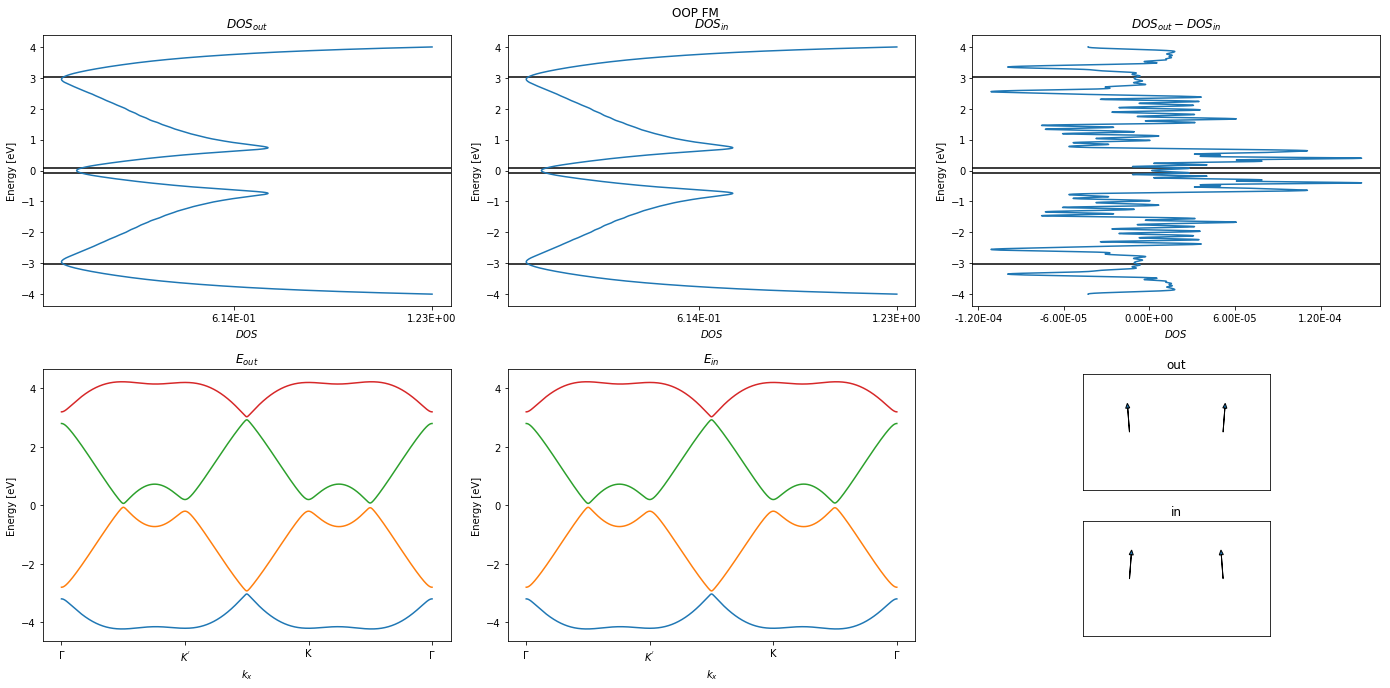

In [76]:
fig,ax = plt.subplots(nrows=2,ncols = 3,figsize = (3*6.4,2*4.8),constrained_layout = True)
fig.suptitle('OOP FM')
plotlables = ['$DOS_{out}$','$DOS_{in}$','$DOS_{out}-DOS_{in}$','$E_{out}$','$E_{in}$']
for numax,axes in enumerate(ax[0,:]):
    axes.set_title(plotlables[numax])
    axes.set_xlabel(r'$DOS$')

        #axes.set_xlabel(r'$k_x$')
        #axes.set_xticks(ticks)
    axes.set_ylabel('Energy [eV]')
    
    dist = max(DOS[numax])-min(DOS[numax])
    step = max(DOS[numax])/2
    nsteps = 4
    exp = 0
    if dist<1:
        for power in range(10):
            y = dist*10**power
            if y>=1:
                exp = power
                ndist = np.round(dist*10**(exp)/nsteps,1)
                step = ndist*10**(-exp)
                break
    axes.xaxis.set_major_locator(plt.MultipleLocator(step))
    axes.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    """axes.axhline(max(E[0]),color = 'k')
    axes.axhline(max(E[1]),color = 'k')
    axes.axhline(min(E[2]),color = 'k')
    axes.axhline(min(E[3]),color = 'k')
    """
    axes.plot(DOS[numax],DOS_E)
for numax,axes in enumerate(ax[1,:]):

    axes.set_xlabel(r'$k_x$')
    axes.set_xticks(ticks)
    axes.set_xticklabels(label)
    axes.set_ylabel('Energy [eV]')   
    if numax<2:
        axes.set_title(plotlables[3+numax])
        axes.setxlim()
        for e in Es[numax]:
            axes.plot(k,e)
    if numax==2:
        axes.set_xticks([])
        axes.set_yticks([])
        axes.set_axis_off()
        locs = ['upper center','lower center']
        titles = ['out','in']
        for j in [0,1]:
            axins = inset_axes(axes, width=2.6, height=1.6,loc = locs[j])
            axins.tick_params(tick1On = False,labelleft=False, labelbottom=False)
            dx = 0.5*np.sin(theta[j])
            dz = 0.5*np.cos(theta[j])
            axins.arrow(1.65, 0, dx[1],dz[1], head_width=0.1, head_length=0.1)
            axins.arrow(-0.65, 0, dx[0],dz[0], head_width=0.1, head_length=0.1)
            axins.set_xlim(-1.8,2.8)
            axins.set_ylim(-1.2,1.2)
            axins.set_title(titles[j])
#with PdfPages("/Users/kipp/STB/weyl_figures/Weyl_figures/" + 'oop_fm_DOS_vs_canting') as pdf:
#    pdf.savefig(fig)
#ax[3].set_title(plotlables[3])
#ax[3].set_xlabel(r'$k_x$')
#ax[3].set_xticks(ticks)
#ax[3].set_ylabel('Energy [eV]')       
#ax[1].plot(DOS_in,DOS_E)
#ax[2].plot(DOS_diff,DOS_E)
#for e in E:
#    ax[3].plot(k,e)


In [61]:
Es.shape

(2, 4, 9001)

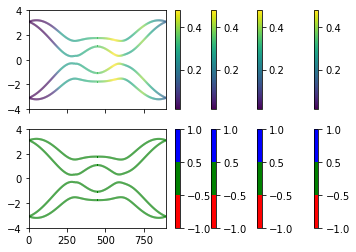

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
x = k
fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)
for j in range(4):
    y = E[j]
# Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    

# Create a continuous norm to map from data points to colors
    norm = plt.Normalize(DOS_up.min(), DOS_up.max())
    lc = LineCollection(segments, cmap='viridis', norm=norm)
# Set the values used for colormapping
    lc.set_array(DOS_up)
    lc.set_linewidth(2)
    line = axs[0].add_collection(lc)
    fig.colorbar(line, ax=axs[0])

# Use a boundary norm instead
    cmap = ListedColormap(['r', 'g', 'b'])
    norm = BoundaryNorm([-1, -0.5, 0.5, 1], cmap.N)
    lc = LineCollection(segments, cmap=cmap, norm=norm)
    lc.set_array(DOS_up)
    lc.set_linewidth(2)
    line = axs[1].add_collection(lc)
    fig.colorbar(line, ax=axs[1])

axs[0].set_xlim(x.min(), x.max())
axs[0].set_ylim(-4., 4.)
plt.show()

In [14]:
points = np.array([np.arange(10),np.arange(10)]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

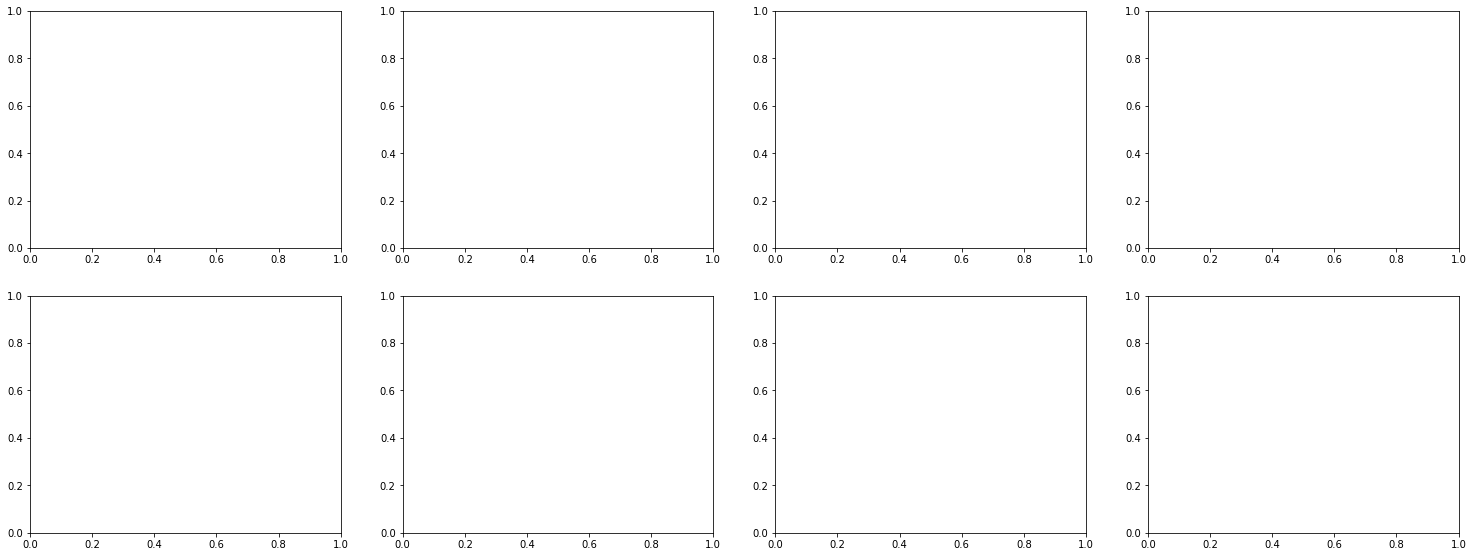

In [3]:
fig,ax = plt.subplots(nrows=2,ncols = 4,figsize = (4*6.4,2*4.8))

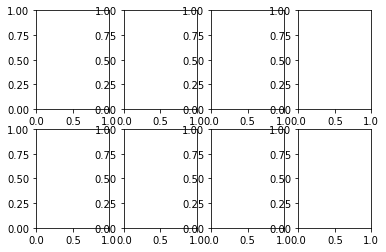

In [46]:
fig,ax = plt.subplots(nrows = 2,ncols = 4)

In [49]:
for numax,axes in enumerate(ax[0,:]):
    print(numax)

0
1
2
3
